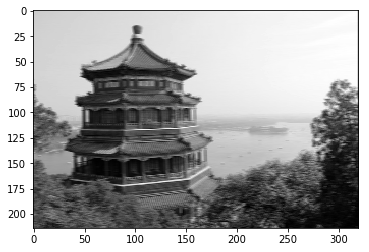

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import sklearn

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape = (7, 7, channels, 2), dtype=np.float32) # filters = [height, width, channels, num_filters]
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
# image = np.array(dataset.images[0])
# plt.imshow(image)
# dataset.images

#plt.imshow(filters[:,:, 0, 0])

#入力Xと二つのフィルタを適用する畳み込み層のグラフを作る
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray")#第一画像の第二特徴量マップをプロット [batch, height, width, channels]

### フィルターを学習させる場合
tf.layers.conv2d()という関数がある。バイアス変数(biasという名前になる)を作って0で初期化する作業をしてくれる。

In [43]:
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size = 7, strides = [2,2], padding="SAME")